# 통신사 고객 분석을 통한 고객 이탈 예측

## 1. 데이터 가져오기
- Telco_customer_churn_cleaned.csv

In [129]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../data/Telco_customer_churn_cleaned.csv')
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,97.20,917.70,3,Churned,Other


In [130]:
len(data.columns), data.columns

(50,
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
        'churn_rate', 'CLTV', 'Churn Reason', 'Count', 'Country', 'State',
        'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Age',
        'Under 30', 'Married', 'Referred a Friend', 'Number of Referrals',
        'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
        'Streaming Music', 'Premium Tech Support', 'Unlimited Data',
        'Total Refunds', 'Total Extra Data Charges',
        'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
        'Customer Status', 'Churn Category'],
       dtype='object'))

## 2. EDA

### 1) 이탈 고객 확인

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.rcParams["font.family"] = "NanumGothic"
%matplotlib inline



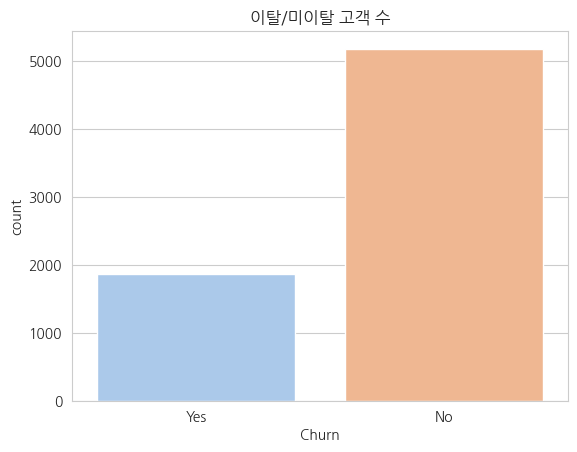

In [132]:
sns.countplot(x=data["Churn"], data=data, palette='pastel').set(title='이탈/미이탈 고객 수');
sns.set_style('whitegrid');

- 이탈고객은 1869명, 미이탈고객은 5174명이다.

### 2) 이탈고객과 미이탈고객의 만족도 비교

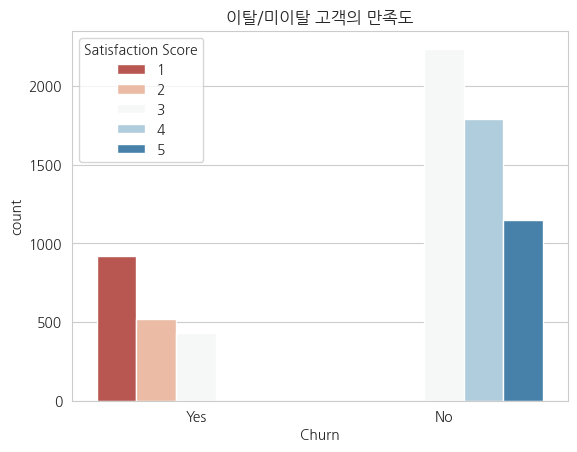

In [134]:
sns.countplot(x='Churn', hue='Satisfaction Score', data=data, palette='RdBu').set(title='이탈/미이탈 고객의 만족도');

- 이탈고객의 만족도는 1~3점에 분포해있으며, 미이탈고객의 만족도는 3~5점 사이에 분포해있다.

### 3) 이탈 여부와의 상관관계

In [135]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'churn_rate', 'CLTV', 'Churn Reason', 'Count', 'Country', 'State',
       'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Age',
       'Under 30', 'Married', 'Referred a Friend', 'Number of Referrals',
       'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Streaming Music', 'Premium Tech Support', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Category'],
      dtype='object')

In [136]:
# No internet service -> No로 통일
data.loc[data['InternetService']=='No', ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']] = 'No'

# No phone service -> No로 통일
data.loc[data['PhoneService']=='No', 'MultipleLines'] = 'No'

In [137]:
# Yes, No 문자열 데이터 -> 0과 1로 수정
target_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 
                'Under 30', 'Married', 'Referred a Friend','Streaming Music', 
                'Premium Tech Support', 'Unlimited Data']

In [138]:
for idx, row in data.iterrows():
    for col in target_cols:
        if (row[col] == 'Yes'):
            data.loc[idx, col] = 1
        elif (row[col] == 'No'):
            data.loc[idx, col] = 0

In [139]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,1,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,1,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,...,1,0,1,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,...,1,1,1,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,0,0,49,1,1,Fiber optic,0,...,1,0,1,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [140]:
data[target_cols] = data[target_cols].astype('int64')

del data['churn_rate']
data[target_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Partner               7043 non-null   int64
 1   Dependents            7043 non-null   int64
 2   PhoneService          7043 non-null   int64
 3   MultipleLines         7043 non-null   int64
 4   OnlineSecurity        7043 non-null   int64
 5   OnlineBackup          7043 non-null   int64
 6   DeviceProtection      7043 non-null   int64
 7   TechSupport           7043 non-null   int64
 8   StreamingTV           7043 non-null   int64
 9   StreamingMovies       7043 non-null   int64
 10  PaperlessBilling      7043 non-null   int64
 11  Churn                 7043 non-null   int64
 12  Under 30              7043 non-null   int64
 13  Married               7043 non-null   int64
 14  Referred a Friend     7043 non-null   int64
 15  Streaming Music       7043 non-null   int64
 16  Premiu

In [141]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CLTV',
       'Churn Reason', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Age', 'Under 30', 'Married',
       'Referred a Friend', 'Number of Referrals', 'Offer',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Streaming Music', 'Premium Tech Support', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Category'],
      dtype='object')

In [142]:
target_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 
                'CLTV', 'Age', 'Under 30', 'Married', 'Referred a Friend', 
                'Number of Referrals', 'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Streaming Music', 
                'Premium Tech Support', 'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 
                'Total Revenue', 'Satisfaction Score' ]

In [143]:
data_corr = data[target_cols].corr()
data_corr

/var/folders/vm/xb_h6qws599f9m01dh0kl9sc0000gn/T/ipykernel_30087/765767421.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data[target_cols].corr()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,...,-0.000713,-0.101874,-0.147823,-0.060625,0.140179,0.028565,0.032917,0.010534,0.084716,-0.116601
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,...,0.010215,0.056745,0.088700,0.119999,0.018792,0.040142,0.017882,0.264230,0.329469,0.077743
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,...,0.004859,0.069066,0.006241,0.063268,-0.093576,0.012119,-0.018967,0.108525,0.081327,0.094984
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,...,0.014705,0.049408,0.238262,0.324221,0.031469,0.059137,0.082381,0.674083,0.853078,0.210056
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,...,0.486673,-0.102748,-0.039252,-0.096340,-0.122395,0.006331,-0.030620,0.289728,0.174788,0.013601
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,...,0.136004,0.091679,0.193362,0.100571,0.159669,0.045491,0.064443,0.323165,0.466583,-0.054236
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,...,-0.028108,0.234738,0.195604,0.354931,0.265037,0.008190,0.058889,0.200477,0.385542,-0.093158
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,...,-0.013909,0.229254,0.245559,0.294233,0.283855,0.016855,0.095852,0.239873,0.474667,0.003252
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,...,-0.031869,0.225877,0.349208,0.333313,0.296619,0.026038,0.073985,0.210057,0.475723,-0.000549
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,...,-0.048217,0.223924,0.276157,1.000000,0.251496,0.034823,0.087941,0.182076,0.396282,0.050086


<Axes: >

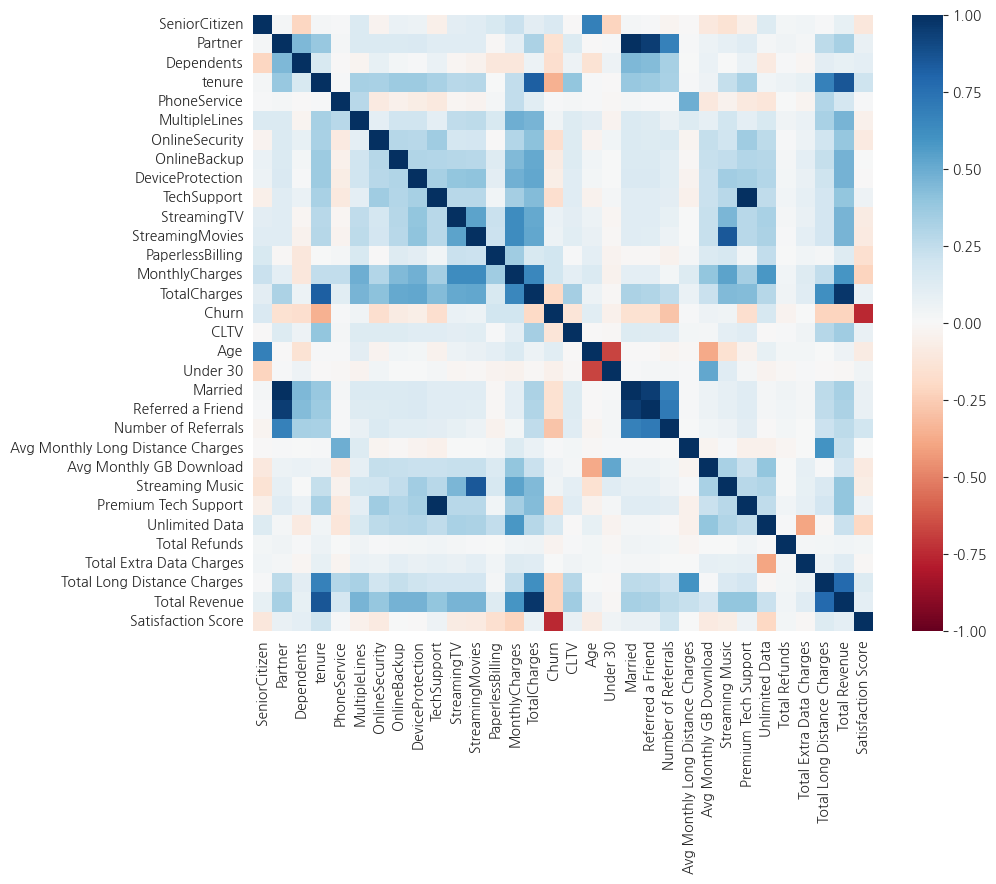

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, cmap='RdBu', vmax=1, vmin=-1)

- 이탈여부(Churn)와 상관이 있는 변수는 순서대로 만족도 점수, 보유 기간, 추천 수, 총 시외 요금, 순이익, 총 요금 이다. 
- (Satisfaction Score, tenure, Number of Referrals, Total Long Distance Charges, Total Revenue, TotalCharges)

In [145]:
# 내림차순으로 했을 때, 0.2가 넘는 변수가 없었다. 그래서 오름차순으로만 진행
data_corr_top6 = data_corr['Churn'].sort_values(ascending=True)[:6] 

In [146]:
data_corr_top6 = pd.DataFrame(data_corr_top6)
data_corr_top6.rename(columns={'Churn':'Correlation'}, inplace=True)
data_corr_top6

,Correlation
Satisfaction Score,-0.754649
tenure,-0.352229
Number of Referrals,-0.286540
Total Long Distance Charges,-0.223756
Total Revenue,-0.223003
TotalCharges,-0.198324


In [147]:
# 상관 정도 절대값으로 표현
data_corr_top6['Correlation'] = abs(data_corr_top6['Correlation'])
data_corr_top6

,Correlation
Satisfaction Score,0.754649
tenure,0.352229
Number of Referrals,0.286540
Total Long Distance Charges,0.223756
Total Revenue,0.223003
TotalCharges,0.198324


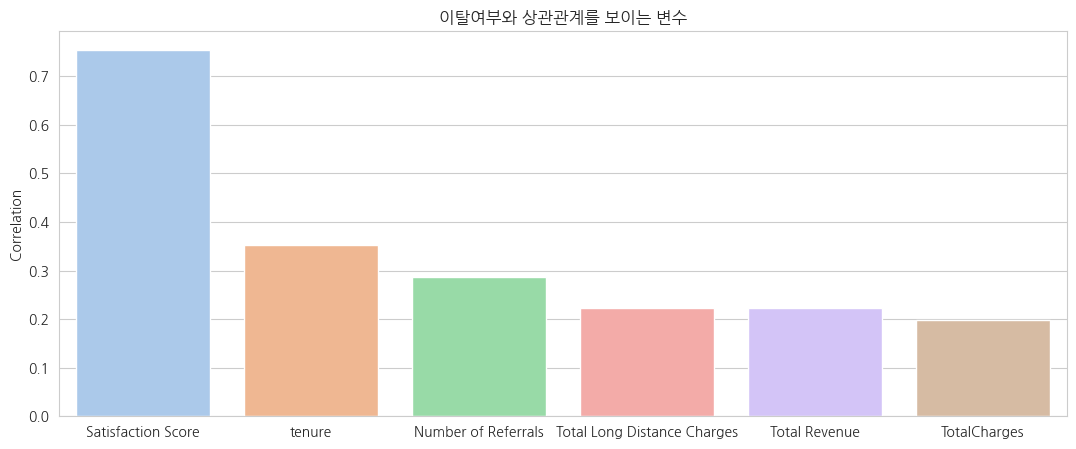

In [148]:
plt.figure(figsize=(13,5))
sns.barplot(data=data_corr_top6, x=data_corr_top6.index, y=data_corr_top6['Correlation'], palette='pastel').set(title='이탈여부와 상관관계를 보이는 변수');

### 4) 이탈 이유 분석

In [149]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CLTV',
       'Churn Reason', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Age', 'Under 30', 'Married',
       'Referred a Friend', 'Number of Referrals', 'Offer',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Streaming Music', 'Premium Tech Support', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Category'],
      dtype='object')

In [150]:
churn_category_df = data[data["Churn Category"]!='0']

In [151]:
churn_category_df = pd.pivot_table(data=churn_category_df, index=churn_category_df["Churn Category"], values='Count', aggfunc=np.sum)
churn_category_df.sort_values(by='Count', ascending=False, inplace=True)

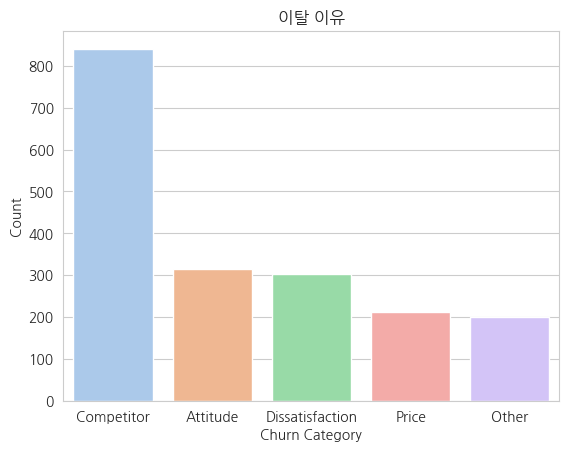

In [152]:
sns.barplot(x=churn_category_df.index, y=churn_category_df['Count'], data=churn_category_df, palette='pastel').set(title='이탈 이유');
sns.set_style('whitegrid');

- 이탈고객의 이탈이유로는 순서대로 경쟁사, 태도, 불만족, 가격, 기타가 있다. 

### 5) 이탈 이유 상세 분석

In [153]:
plt.rcParams["font.family"] = "NanumGothic"
%matplotlib inline

In [154]:
churn_reason_pv = pd.pivot_table(data=data, index=['Churn Reason'], values=['Count'], aggfunc=np.sum)
churn_reason_pv.sort_values(by='Count', ascending=True, inplace=True)

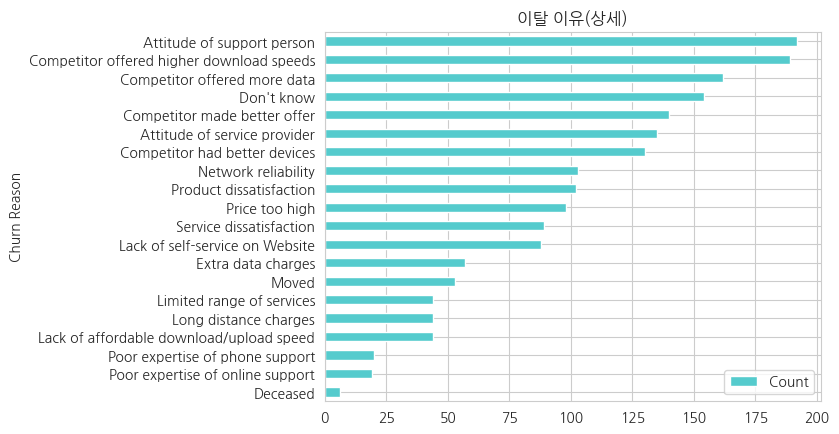

In [155]:
churn_reason_pv.plot(kind='barh', title='이탈 이유(상세)', color='#55CBCD');
plt.show();

- 이탈 이유를 좀 더 상세하게 보자면, 담당자의 태도, 경쟁사의 더 빠른 데이터 속도 제공, 경쟁사의 더 많은 데이터 제공 등이 있다. 
- 그 뒤로는 이유 없음, 경쟁사의 더 나은 제안, 서비스 제공자의 태도, 경쟁사의 더 좋은 기기, 네트워크 안정성, 제품 불만족 등이 있다. 

In [156]:
churn_reason_word = data['Churn Reason']
churn_reason_word = pd.DataFrame(churn_reason_word)
churn_reason_word = churn_reason_word['Churn Reason'].dropna()
churn_reason_word = pd.DataFrame(churn_reason_word)

In [157]:
word_list = []
for idx, row in churn_reason_word.iterrows():
    words = row['Churn Reason'].split()
    for word in words:
        word_list.append(word)

In [158]:
word_list = pd.DataFrame(word_list)
word_list['Count'] = 1
word_list.rename(columns={0:'Word'}, inplace=True)

In [159]:
word_pivot = pd.pivot_table(data=word_list, index=['Word'], values=['Count'], aggfunc='sum')
word_pivot.sort_values(by='Count', ascending=False, inplace=True)
word_pivot.reset_index(inplace=True)

In [160]:
word_pivot.loc[13, "Word"] = "Don't know"

offer1 = word_pivot.loc[2, "Count"]  # offered 의 cnt
offer2 = word_pivot.loc[16, "Count"]  # offer 의 cnt
word_pivot.loc[2, "Count"] = offer1+offer2

In [161]:
# 이미 처리한 단어 + 의미없는 단어 삭제
drop_words = ["know", "offer", "of", "on", "too", "had", "made"]

for idx, row in word_pivot.iterrows():
    if row["Word"] in drop_words:
        word_pivot.drop([idx], inplace=True)

In [162]:
word_pivot.sort_values(by="Count", ascending=False, inplace=True)
word_pivot.reset_index(drop=True)

,Word,Count
0,Competitor,621
1,offered,491
2,Attitude,327
3,better,270
4,support,231
5,data,219
6,person,192
7,dissatisfaction,191
8,download,189
9,higher,189


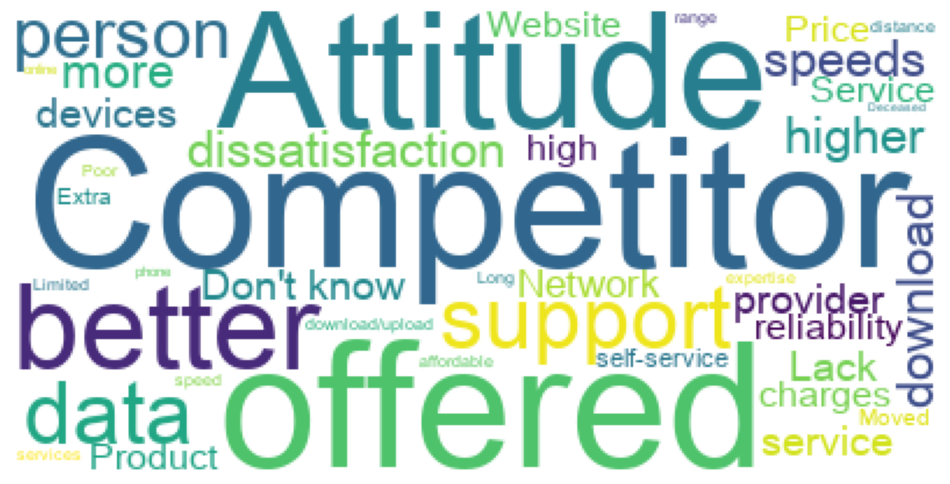

In [163]:
from wordcloud import WordCloud

wc = word_pivot.set_index("Word").to_dict()["Count"]

wordcloud = WordCloud(
    font_path="/Library/Fonts/Arial Unicode.ttf",
    relative_scaling=0.2,
    background_color="white"
).generate_from_frequencies(wc)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

=> 이탈이유와 그 상세 분석을 한 결과, 가장 큰 이유는 경쟁사 때문인 것으로 추측해볼 수 있다. 또한 이탈이유로 태도, 제공, 지원 등이 있다.

### 6) 고객가치가 높은 고객들의 특성 분석

In [164]:
data_CLTV = data.sort_values(by='CLTV', ascending=False)
top10per = round(len(data_CLTV) * 0.2, 0)
top10per

1409.0

In [165]:
data_CLTV = data_CLTV[:1409]
del data_CLTV['Count']
data_CLTV['CLTV'].head()

3482    6500
2550    6499
6202    6499
3600    6495
6839    6494
Name: CLTV, dtype: int64

In [166]:
data_CLTV_corr = data_CLTV.corr()
data_CLTV_corr

/var/folders/vm/xb_h6qws599f9m01dh0kl9sc0000gn/T/ipykernel_30087/2884242391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_CLTV_corr = data_CLTV.corr()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
SeniorCitizen,1.000000,0.025254,-0.201039,0.038819,-0.021586,0.129707,-0.059558,0.081902,0.084461,-0.077941,...,0.023888,-0.130106,-0.188139,-0.077941,0.107627,0.010091,0.034767,0.031753,0.095148,-0.120773
Partner,0.025254,1.000000,0.455780,0.402574,0.004503,0.180286,0.187839,0.202040,0.200083,0.154596,...,-0.008594,0.115720,0.131933,0.154596,0.058313,0.067503,0.034485,0.248662,0.354826,0.101482
Dependents,-0.201039,0.455780,1.000000,0.177265,0.004175,0.024149,0.099654,0.042092,0.024805,0.085279,...,-0.007333,0.148867,0.035017,0.085279,-0.026478,0.081914,-0.000252,0.107750,0.107673,0.072069
tenure,0.038819,0.402574,0.177265,1.000000,-0.011322,0.353878,0.299468,0.346339,0.387822,0.329241,...,-0.000435,0.048237,0.246222,0.329241,0.041386,0.049932,0.056583,0.609393,0.811268,0.241333
PhoneService,-0.021586,0.004503,0.004175,-0.011322,1.000000,0.307071,-0.071782,-0.036372,-0.043308,-0.071325,...,0.471258,-0.061544,-0.033668,-0.071325,-0.115901,0.021749,-0.009075,0.325295,0.200964,0.031100
MultipleLines,0.129707,0.180286,0.024149,0.353878,0.307071,1.000000,0.100635,0.207040,0.238882,0.136982,...,0.170778,0.110003,0.229663,0.136982,0.146024,0.009989,0.080331,0.368599,0.518629,-0.034856
OnlineSecurity,-0.059558,0.187839,0.099654,0.299468,-0.071782,0.100635,1.000000,0.264870,0.308431,0.385995,...,-0.009291,0.258584,0.232845,0.385995,0.273937,0.051157,0.080967,0.156815,0.373040,-0.164217
OnlineBackup,0.081902,0.202040,0.042092,0.346339,-0.036372,0.207040,0.264870,1.000000,0.331202,0.327172,...,0.017151,0.258451,0.278333,0.327172,0.319148,0.012441,0.095488,0.244065,0.508570,-0.012757
DeviceProtection,0.084461,0.200083,0.024805,0.387822,-0.043308,0.238882,0.308431,0.331202,1.000000,0.361849,...,0.009173,0.236316,0.365149,0.361849,0.309333,0.015981,0.081296,0.233562,0.530359,0.002797
TechSupport,-0.077941,0.154596,0.085279,0.329241,-0.071325,0.136982,0.385995,0.327172,0.361849,1.000000,...,-0.014309,0.250770,0.331225,1.000000,0.265020,0.054860,0.083620,0.181694,0.428699,0.011839


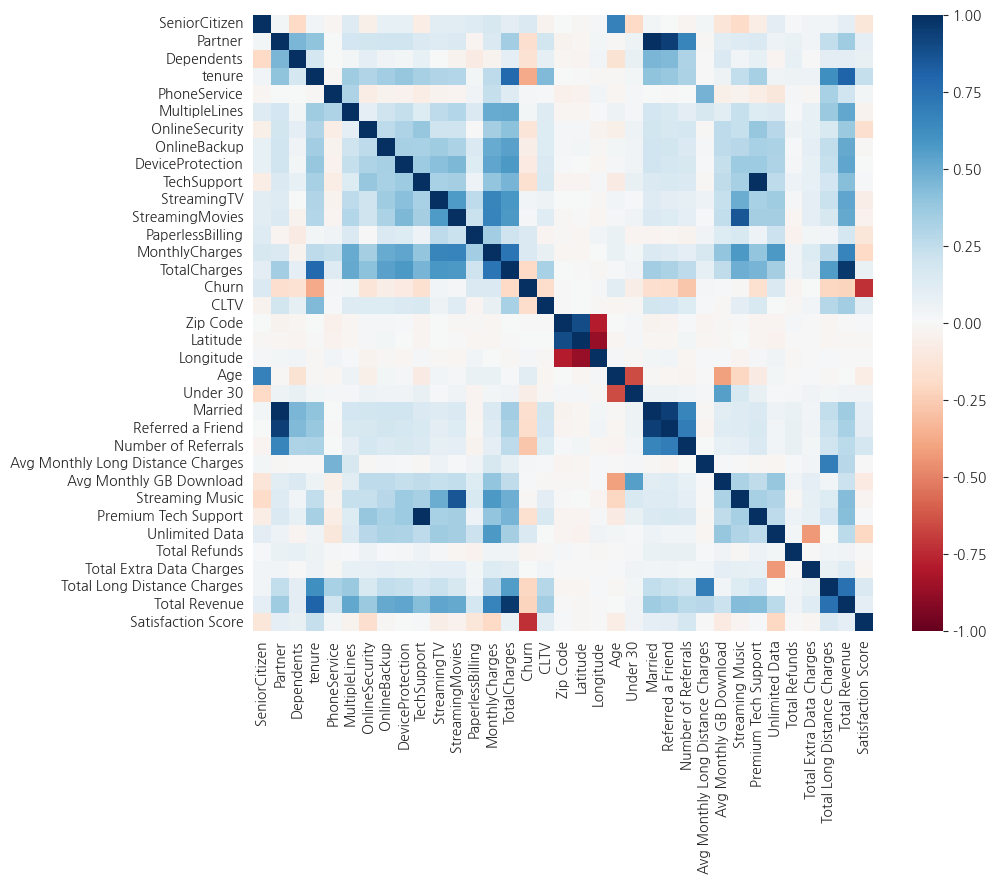

In [167]:
plt.figure(figsize=(10,8))
sns.heatmap(data_CLTV_corr, cmap='RdBu', vmax=1, vmin=-1);

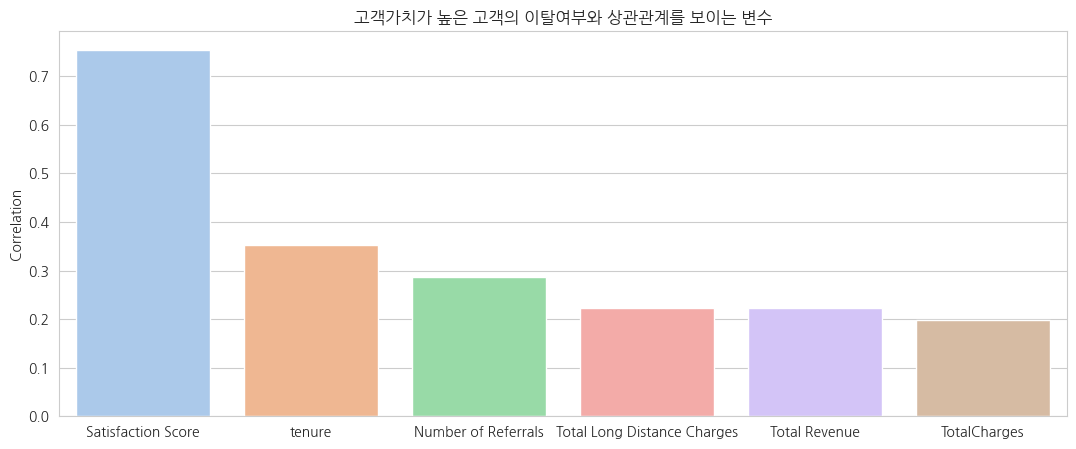

In [168]:
# 내림차순으로 했을 때, 0.2가 넘는 변수가 없었다. 그래서 오름차순으로만 진행
data_corr_top6 = data_corr['Churn'].sort_values(ascending=True)[:6]
data_corr_top6 = pd.DataFrame(data_corr_top6)
data_corr_top6.rename(columns={'Churn':'Correlation'}, inplace=True)
data_corr_top6['Correlation'] = abs(data_corr_top6['Correlation'])

plt.figure(figsize=(13,5))
sns.barplot(data=data_corr_top6, x=data_corr_top6.index, y=data_corr_top6['Correlation'], palette='pastel').set(title='고객가치가 높은 고객의 이탈여부와 상관관계를 보이는 변수');


In [169]:
data_corr_top3 = data_corr['Satisfaction Score'].sort_values(ascending=True)[:3] # 0은 만족도 자신
data_corr_top3 = pd.DataFrame(data_corr_top3)
data_corr_top3

,Satisfaction Score
Churn,-0.754649
MonthlyCharges,-0.223922
Unlimited Data,-0.210489


In [170]:
data_corr_top1 = data_corr['Satisfaction Score'].sort_values(ascending=False)[1:2] # 0은 만족도 자신
data_corr_top1 = pd.DataFrame(data_corr_top1)
data_corr_top1

,Satisfaction Score
tenure,0.210056


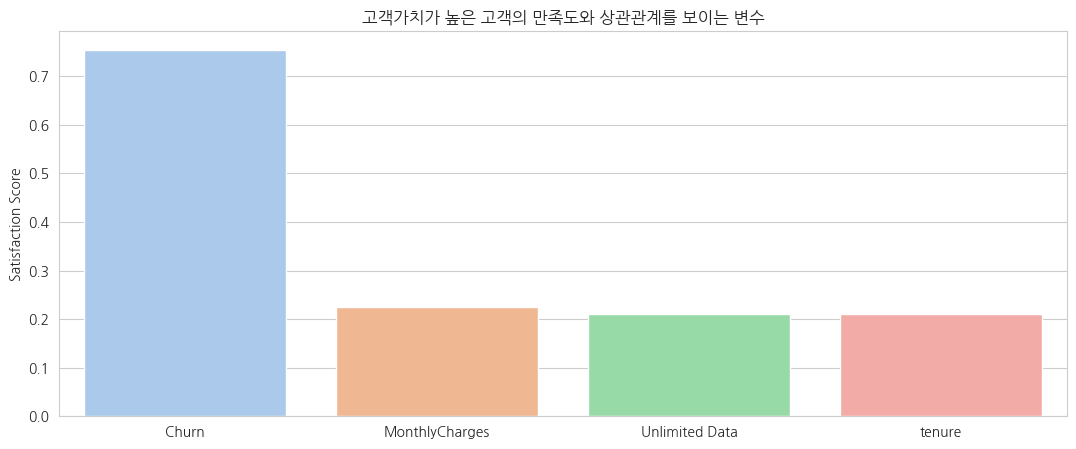

In [171]:
data_corr_top4 = pd.concat([data_corr_top3, data_corr_top1])
data_corr_top4['Satisfaction Score'] = abs(data_corr_top4['Satisfaction Score'])


plt.figure(figsize=(13,5))
sns.barplot(data=data_corr_top4, x=data_corr_top4.index, y=data_corr_top4['Satisfaction Score'], palette='pastel').set(title='고객가치가 높은 고객의 만족도와 상관관계를 보이는 변수');


- 고객가치가 높은 고객들의 이탈여부(Churn)와 상관이 있는 변수는 전체 고객들의 기준과 같이 만족도 점수, 보유 기간,  추천 수, 순이익, 총 시외 요금, 총 요금 이다. 
- (Satisfaction Score, tenure, Number of Referrals, Total Revenue, Total Long Distance Charges, TotalCharges)
<br><br>
- 또한, 고객가치가 높은 고객들의 만족도 점수(Satisfaction Score)와 상관이 있는 변수는 순서대로 이탈 여부, 월별요금, 무제한 데이터, 보유 기간 이다.
- (Churn, MonthlyCharges, Unlimited Data, tenure) 

## 3. 머신러닝

### 1) 데이터 전처리

In [172]:
# InternetService 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()

data['gender_le'] = le1.fit_transform(data['gender'])
data['InternetService_le'] = le2.fit_transform(data['InternetService'])
data['Contract_le'] = le3.fit_transform(data['Contract'])
data['PaymentMethod_le'] = le4.fit_transform(data['PaymentMethod'])
data['Offer_le'] = le5.fit_transform(data['Offer'])

In [173]:
data.loc[[0], ['gender_le', 'InternetService_le', 'Contract_le', 'PaymentMethod_le', 'Offer_le']]

,gender_le,InternetService_le,Contract_le,PaymentMethod_le,Offer_le
0,1,0,0,3,0


In [174]:
for i, label in enumerate(le1.classes_):
    print(i, '->', label)

0 -> Female
1 -> Male


In [175]:
for i, label in enumerate(le2.classes_):
    print(i, '->', label)

0 -> DSL
1 -> Fiber optic
2 -> No


In [176]:
for i, label in enumerate(le3.classes_):
    print(i, '->', label)

0 -> Month-to-month
1 -> One year
2 -> Two year


In [177]:
for i, label in enumerate(le4.classes_):
    print(i, '->', label)

0 -> Bank transfer (automatic)
1 -> Credit card (automatic)
2 -> Electronic check
3 -> Mailed check


In [178]:
for i, label in enumerate(le5.classes_):
    print(i, '->', label)

0 -> None
1 -> Offer A
2 -> Offer B
3 -> Offer C
4 -> Offer D
5 -> Offer E


### 2) 데이터 분리

In [179]:
target_cols = ['gender_le', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
               'PhoneService', 'MultipleLines', 'InternetService_le', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_le', 
                'PaperlessBilling','PaymentMethod_le', 'MonthlyCharges', 'TotalCharges', 
                'CLTV', 'Age', 'Under 30', 'Married', 'Referred a Friend', 
                'Number of Referrals', 'Offer_le', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Streaming Music', 
                'Premium Tech Support', 'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 
                'Total Revenue', 'Satisfaction Score' ]

In [180]:
from sklearn.model_selection import train_test_split

X = data[target_cols]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) 

np.unique(y_train, return_counts=True)

(array([0, 1]), array([4138, 1496]))

### 3) 분석
#### 3-1) 의사결정나무
##### 3-1-1) 스케일러 x

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 학습
churn_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
churn_tree.fit(X_train, y_train)

# 예측
y_pred_tr = churn_tree.predict(X_train)
y_pred_test = churn_tree.predict(X_test)

# 정확도
print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.939297124600639
0.9382540809084458


##### 3-1-2) StandardScaler

In [182]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_ss = ss.fit_transform(X_train)

# 학습
churn_tree_ss = DecisionTreeClassifier(max_depth=3, random_state=13)
churn_tree_ss.fit(X_train, y_train)

# 예측
y_pred_tr = churn_tree_ss.predict(X_train)
y_pred_test = churn_tree_ss.predict(X_test)

# 정확도
print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))


0.939297124600639
0.9382540809084458


##### 3-1-3) MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_mm = mm.fit_transform(X_train)

# 학습
churn_tree_mm = DecisionTreeClassifier(max_depth=3, random_state=13)
churn_tree_mm.fit(X_train, y_train)

# 예측
y_pred_tr = churn_tree_mm.predict(X_train)
y_pred_test = churn_tree_mm.predict(X_test)

# 정확도
print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.939297124600639
0.9382540809084458


- 스케일러 적용 한 것, 안 한 것 모두 의사결정난무 수행 시 정확도가 똑같다. 

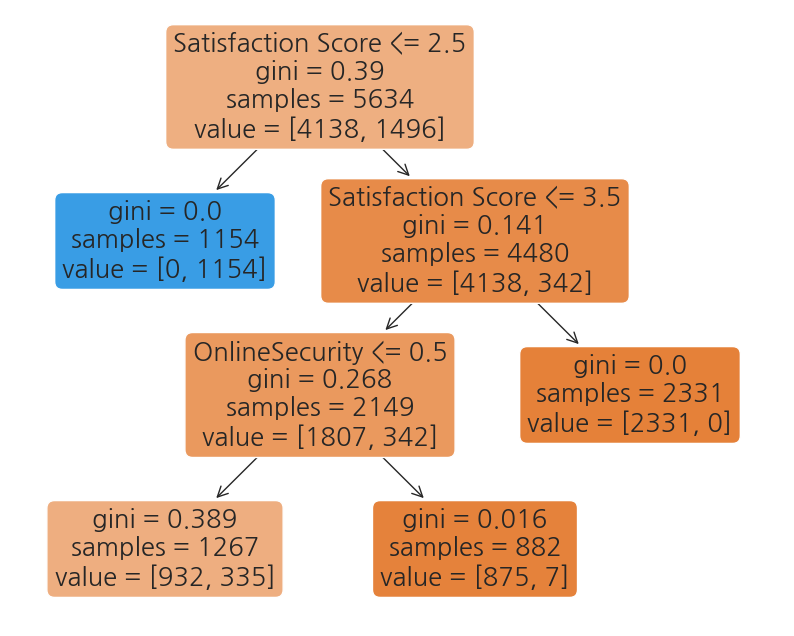

In [184]:
# plot_tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(churn_tree, feature_names=X.columns, rounded=True, filled=True);
plt.show()

- 만족도와 온라인 보안 값으로 분류된다.

##### 3-1-4) K-fold

In [185]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

kfold = KFold(n_splits=5)
churn_tree_cv = DecisionTreeClassifier(max_depth=3, random_state=13)
print(np.mean(cross_val_score(churn_tree_cv, X, y, scoring=None, cv=kfold)))
cross_validate(churn_tree_cv, X, y, scoring=None, cv=kfold, return_train_score=True)

0.9391057487579844


{'fit_time': array([0.01115322, 0.01033306, 0.00991631, 0.00994301, 0.00981092]),
 'score_time': array([0.00086188, 0.000916  , 0.00092483, 0.00098085, 0.0008142 ]),
 'test_score': array([0.77430802, 0.92122072, 1.        , 1.        , 1.        ]),
 'train_score': array([0.98029819, 0.94355698, 0.92385517, 0.92386868, 0.92386868])}

##### 3-1-5) stratified K-fold

In [186]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
churn_tree_cv = DecisionTreeClassifier(max_depth=3, random_state=13)
print(np.mean(cross_val_score(churn_tree_cv, X, y, scoring=None, cv=skfold)))
cross_validate(churn_tree_cv, X, y, scoring=None, cv=skfold, return_train_score=True)

0.9390886105555196


{'fit_time': array([0.01040506, 0.0102489 , 0.01024103, 0.01023197, 0.01035094]),
 'score_time': array([0.00095701, 0.00096011, 0.0008409 , 0.00074291, 0.00095606]),
 'test_score': array([0.93399574, 0.94251242, 0.93967353, 0.93892045, 0.94034091]),
 'train_score': array([0.94036209, 0.93823216, 0.93894214, 0.93913043, 0.93877551])}

##### 3-1-6) GridSearchCV

In [187]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[1,2,3,4,5]}
churn_tree_grid = DecisionTreeClassifier(max_depth=3, random_state=13)
gridsearch = GridSearchCV(estimator=churn_tree_grid, param_grid=params, cv=5)
gridsearch.fit(X, y)

print('best_estimator : ', gridsearch.best_estimator_)
print('best_score : ', gridsearch.best_score_)
print('best_params : ', gridsearch.best_params_)

best_estimator :  DecisionTreeClassifier(max_depth=5, random_state=13)
best_score :  0.9426373274082198
best_params :  {'max_depth': 5}


In [188]:
score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params','rank_test_score','mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'max_depth': 1},3,0.939089,0.002814
1,{'max_depth': 2},3,0.939089,0.002814
2,{'max_depth': 3},3,0.939089,0.002814
3,{'max_depth': 4},2,0.941644,0.002187
4,{'max_depth': 5},1,0.942637,0.002533


- max_depth를 5로 했을 때, 성능이 가장 좋다.

#### 3-2) 로지스틱 회귀

In [198]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))  
print(accuracy_score(y_test, y_pred_test)) 

0.8161164359247426
0.8119233498935415


/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 로지스틱 회귀분석 결과, 의사결정나무보다 정확도가 좋지 않다.

### 4) 모델평가

#### 4-1) 의사결정나무 

In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 가장 성능이 좋았던 max_depth 5로 설정
churn_tree = DecisionTreeClassifier(max_depth=5, random_state=13)
churn_tree.fit(X_train, y_train)

y_pred_test = churn_tree.predict(X_test)

print('accuracy_score : ', accuracy_score(y_test, y_pred_test))
print('precision_score : ', precision_score(y_test, y_pred_test))
print('recall_score : ', recall_score(y_test, y_pred_test))
print('f1_score : ', f1_score(y_test, y_pred_test))
print('roc_auc_score : ', roc_auc_score(y_test, y_pred_test))

tree_data = [
    accuracy_score(y_test, y_pred_test), 
    precision_score(y_test, y_pred_test), 
    recall_score(y_test, y_pred_test), 
    f1_score(y_test, y_pred_test), 
    roc_auc_score(y_test, y_pred_test)
]


accuracy_score :  0.9325762952448545
precision_score :  0.8475
recall_score :  0.9088471849865952
f1_score :  0.8771021992238034
roc_auc_score :  0.9249834380531431


#### 4-2) 로지스틱회귀

In [213]:
y_pred_test = lr.predict(X_test)

print('accuracy_score : ', accuracy_score(y_test, y_pred_test))
print('precision_score : ', precision_score(y_test, y_pred_test))
print('recall_score : ', recall_score(y_test, y_pred_test))
print('f1_score : ', f1_score(y_test, y_pred_test))
print('roc_auc_score : ', roc_auc_score(y_test, y_pred_test))

lr_data = [
    accuracy_score(y_test, y_pred_test), 
    precision_score(y_test, y_pred_test), 
    recall_score(y_test, y_pred_test), 
    f1_score(y_test, y_pred_test), 
    roc_auc_score(y_test, y_pred_test)
]

accuracy_score :  0.8119233498935415
precision_score :  0.6836734693877551
recall_score :  0.5388739946380697
f1_score :  0.6026986506746626
roc_auc_score :  0.724552827434865


#### 4-3) 의사결정나무와 로지스틱회귀 모델 성능 비교

In [223]:
result_df = pd.DataFrame(index=['accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'], columns=['tree','logistic'])
result_df['tree'] = tree_data
result_df['logistic'] = lr_data
result_df

,tree,logistic
accuracy_score,0.932576,0.811923
precision_score,0.847500,0.683673
recall_score,0.908847,0.538874
f1_score,0.877102,0.602699
roc_auc_score,0.924983,0.724553


/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


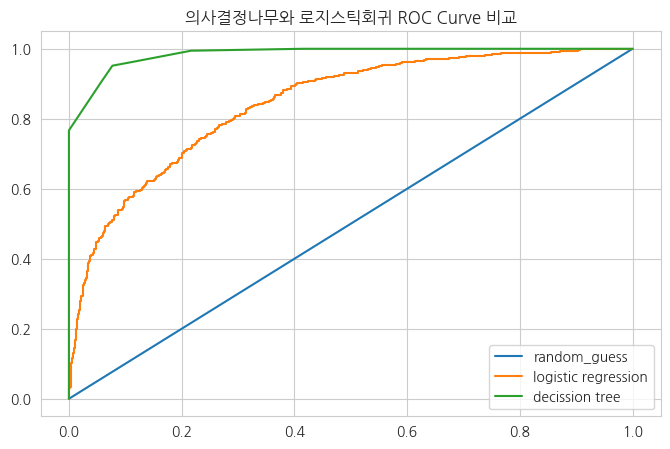

In [224]:
from sklearn.metrics import roc_curve

# 의사결정나무
churn_tree = DecisionTreeClassifier(max_depth=5, random_state=13)
churn_tree.fit(X_train, y_train)

# 로지스틱 회귀
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)

models = {'logistic regression':lr, 'decission tree':churn_tree}

# ACU 그래프
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1], label='random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

plt.title('의사결정나무와 로지스틱회귀 ROC Curve 비교')
plt.grid(True)
plt.legend()
plt.show()

- 의사결정나무가 로지스틱회귀보다 성능이 좋다. 

### 5) 테스트

In [196]:
target_cols = ['gender_le', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
               'PhoneService', 'MultipleLines', 'InternetService_le', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_le', 
                'PaperlessBilling','PaymentMethod_le', 'MonthlyCharges', 'TotalCharges', 'CLTV', 
                'Age', 'Under 30', 'Married', 'Referred a Friend', 'Number of Referrals', 
                'Offer_le', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Streaming Music', 'Premium Tech Support', 
                'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 
                'Satisfaction Score' ]

In [197]:
info = np.array([[0, 0, 0, 0, 36,
                  1, 0, 1, 1, 0,
                  0, 0, 1, 1, 0,
                  1, 2, 80.45, 950.20, 5374.00,
                  28, 1, 0, 0, 0,
                  4, 6.97, 80, 0, 1,
                  1, 0.0, 0, 83.64, 1034,
                  3]])
print('test_result : ', churn_tree.predict_proba(info)[0,1])

test_result :  0.07142857142857142


/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


- gender_le : Female  
- SeniorCitizen : 0  
- Partner : No
- Dependents : No
- tenure : 36
- PhoneService : Yes
- MultipleLines : No 
- InternetService_le : Fiber optic 
- OnlineSecurity : Yes 
- OnlineBackup : No
- DeviceProtection : No 
- TechSupport : No
- StreamingTV : Yes
- StreamingMovies : Yes
- Contract_le : Month-to-month
- PaperlessBilling : Yes
- PaymentMethod_le : Electronic check 
- MonthlyCharges : 80.45 
- TotalCharges : 950.20 
- CLTV : 5374
- Age : 28 
- Under 30 : Yes
- Married : No
- Referred a Friend : No
- Number of Referrals : 0
- Offer_le : Offer D
- Avg Monthly Long Distance Charges : 6.97 
- Avg Monthly GB Download : 80
- Streaming Music : No
- Premium Tech Support : Yes
- Unlimited Data : Yes
- Total Refunds : 0.0
- Total Extra Data Charges : 0
- Total Long Distance Charges : 83.64
- Total Revenue : 1034
- Satisfaction Score : 3 

==> 새로운 데이터로 분류예측 해본 결과, 해당 인물은 '7%의 확률로 이탈'할 것으로 예측된다. 